## 1. Escolha do Problema e da base de dados

### Objetivo do trabalho

O objetivo do trabalho é aplicar técnicas e algoritmos de Aprendizado de Máquina para resolver um problema real. Nesse sentido, selecionamos uma base de dados de risco de créditos com o intuito de realizar previsões sobre quais usuários irão pagar o empréstimo e quais não irão.

### Link da base de dados 

Link de acesso: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

### Informações sobre a base de dados credit_risk_dataset

O Dataframe possui as seguintes características:
1. Conteúdo das Colunas:
   - **person_age:** Idade da pessoa (type: inteiro).
   - **person_income:** Renda da pessoa (type: inteiro).
   - **person_home_ownership:** Tipo de moradia da pessoa (type: string).
   - **person_emp_length:** Tempo (anos) que a pessoa está empregada (type: float). 
   - **loan_intent:** Finalidade do empréstimo (type: string).
   - **loan_grade:** Classificação do emprestimo realizada pelo credor (type: string). 
   - **loan_amnt:** Valor do empréstimo (type: inteiro).
   - **loan_int_rate:** Taxa de juros aplicada no empréstimo (type: foat). 
   - **loan_status:** Status do empréstimo, 1 é inadimplência e 0 caso o contrário (type: inteiro).
   - **loan_percent_income:** Percentual da renda (type: float).
   - **cb_person_default_on_file:** Indica se a pessoa tem histórico de inadiplência, Y para sim e N caso o contrário (type: string). 
   - **cb_person_cred_hist_length:** Duração do histórico de crédito (type: inteiro).
2. Tipos de variáveis das colunas:
   - **person_age:** Discreta (idade representada por números inteiros).
   - **person_income:** Contínua (renda representada por números reais).
   - **person_home_ownership:** Nominal (não possui ordem específica).
   - **person_emp_length:**  Discreta.
   - **loan_intent:** Nominal (não possui ordem específica).
   - **loan_grade:** Ordinal (classificação de credito).
   - **loan_amnt:** Contínua (valor do empréstimo é representada por números reais).
   - **loan_int_rate:** Contínua (taxa de juros é representada por números reais).
   - **loan_status:** Discreta.
   - **loan_percent_income:** Contínua (porcentagem do valor pode ser representada por números reais).
   - **cb_person_default_on_file:**  Nominal (não possui ordem específica).
   - **cb_person_cred_hist_length:** Discreta (anos podem ser ordenados).

Note que para determinar o tipo de variável da coluna, estamos levando em conta que ela pode ser:
- Numérica
   - **Contínua:** Números reais. Ex: Temperatura, altura, peso e salário.
   - **Discreta:** Conjunto de valores finitos (inteiros).
- Categórica
   - **Nominal:** Dados não mensuráveis. Ex: Cor dos olhos e gênero.
   - **Ordinal:** Categorização sob uma ordenação. Ex: Tamanho de blusa P, M e G.

## 2. Pré-processamento de dados

### Importações das bibliotecas para o funcionamento do código:

1. **pandas**
   - Manipulação e análise de dados de DataFrame
2. **Numpy**
   - Biblioteca para computação numérica, fornece suporte para arrays multidimensionais eficientes e funções matemáticas.
3. **matplotlib.pyplot**
   - Subbiblioteca do Matplotlib, fornece uma interface semalhante ao MATLAB para criar gráficos estáticos. 
4. **plotly**
   - Criação e visualização interativa de dados.
5. **seaborn**
   - Visualização de dados baseada no Matplotlib, auxilia na criação de gráficos estátiscos.
7. **sklearn**
   - Biblioteca para aprendizado de máquina, ou seja, fornece várias ferramenteas para tarefas de aprendizado de máquina, por exemplo, classificação, regressão e agrupamento.

**OBS:** Talvez seja necessário atualizar o nbformart para a visualização dos gráficos dinâmicos.
- pip install --upgrade nbformat   


In [773]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

### Carregando o DataFrame

In [774]:
base_credit_risk = pd.read_csv("credit_risk_dataset.csv") # Utilizando a função read_csv do pandas para carregar o csv

In [775]:
base_credit_risk_2 = base_credit_risk.copy() # Realizando uma cópida

### Exploração dos dados

In [776]:
base_credit_risk_2.head() # Analisando o começo do DataFrame

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [777]:
base_credit_risk_2.tail() # Analisando o fim do DataFrame

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [778]:
base_credit_risk_2.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Na célula acima, estamos analisando os dados estatísticos de cada coluna da nossa base de dados. Utilizando a função ***describe***, é possível obter para todas as colunas: 
- **count:** Quantidade de registros.
- **mean:** Média dos valores dos registros.
- **std:** Desvio padrão.
- **min:** Menor valor do registro.
- **25%:** Primeiro quaril.
- **50%:** Segundo quartil (mediana).
- **75%:** Terceiro quartil.
- **max:** maior valor do registro.

**OBS:** Com esses dados obtidos, na seção seguinte iremos complementar com um apoio visual, isto é, iremos gerar alguns gráficos para dar suporte visual a nossa análise.

In [779]:
base_credit_risk_2["person_income"].mean() # Calculando a média da renda pessoal

66074.84846996715

In [780]:
base_credit_risk_2[base_credit_risk_2["person_income"] >= 6000000] # Analisando a maior renda pessoal

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [781]:
base_credit_risk_2[base_credit_risk_2["person_income"] <= 4000] # Analisando a pessoa com a menor renda pessoal

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
31930,41,4000,RENT,0.0,MEDICAL,C,2000,13.22,1,0.5,Y,15


In [782]:
base_credit_risk_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Note que a coluna ***person_emp_length*** e ***loan_int_rate*** possuem campos vazios, ou seja, existem valores nulos nessas colunas. Futuramente, iremos tratar isso!

### Visualização de dados

#### Informações sobre essa seção

1. Para a visualização dos dados, foram utilizadas as seguintes funções:
- **np.unique():** retorna as variáveis presentes na coluna e a quantidade.
- **sns.counplot():** cria um gráfico de barras para contar o valor de ocorrências.
- **plt.hist():** cria um histograma.
- **px.scatter_matrix():** cria uma matrix de gráfico de dispersão.

2. Dados importantes observados através dos gráficos:
- Existe uma grande diferença na quantidade de pessoas que pagaram as dívidas e as que não pagaram.
- Idades extremamente altas. (exemplo: 144 anos)
- Existem muitos clientes jovens entre 20 a 30 anos.
- A maioria dos clientes possuem entre 0 a 1M de renda pessoal.
- Existem pessoas que estão trabalhando a mais de 60 anos.

**OBS:** Alguns Histogramas, por terem poucas pessoas em um determinado setor, não é possível ver a barra. Entretanto, ela existe e os dados estão presentes em outros gráficos que acompanham eles!

##### Visualização da quantidade de pessoas que pagam o empréstimo

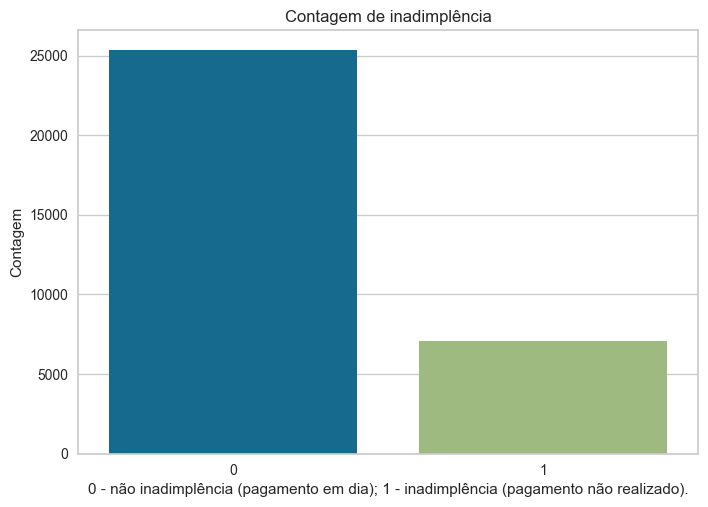

In [891]:
# Utilizado o ponto e vírgula no final para retornar apenas o gráfico.
sns.countplot(x = base_credit_risk_2["loan_status"]);

# Descrição
plt.xlabel('0 - não inadimplência (pagamento em dia); 1 - inadimplência (pagamento não realizado).')
plt.ylabel('Contagem')
plt.title('Contagem de inadimplência')
plt.show() 

##### Visualização da quantidade de anos que a pessoa trabalha

In [783]:
grafico = px.scatter_matrix(base_credit_risk_2["person_emp_length"])

# Descrição
grafico.update_layout(
    title="Matriz de Dispersão - Tempo empregado",
    title_font_size=20
)

grafico.show()

**Nota:** existem pessoas empregas da 123 anos!

##### Visualização do histórico de inadimplência

In [784]:
np.unique(base_credit_risk_2["cb_person_default_on_file"], return_counts=True)

(array(['N', 'Y'], dtype=object), array([26836,  5745], dtype=int64))

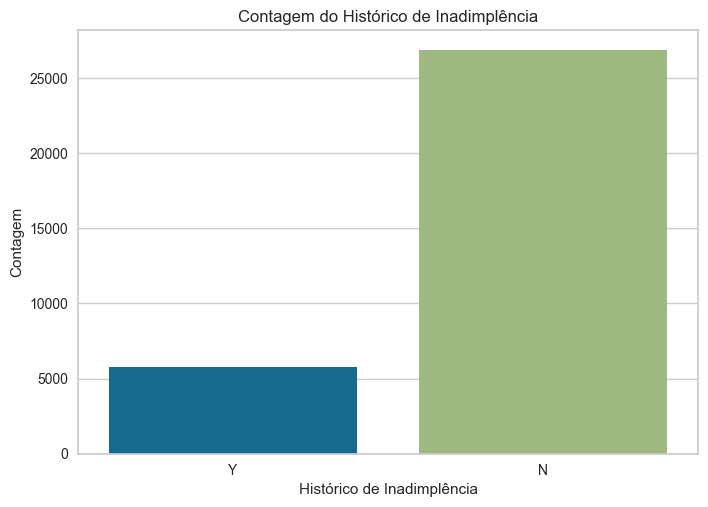

In [785]:
# Utilizado o ponto e vírgula no final para retornar apenas o gráfico.
sns.countplot(x = base_credit_risk_2["cb_person_default_on_file"]);

# Descrição
plt.xlabel('Histórico de Inadimplência')
plt.ylabel('Contagem')
plt.title('Contagem do Histórico de Inadimplência')
plt.show() 

**Nota:** o gráfico apresenta uma grande diferença entre as pessoas que possuem inadimplência no histórico e as que não possuem.

#### Visualização das idades

In [786]:
grafico = px.scatter_matrix(base_credit_risk_2["person_age"])

# Descrição
grafico.update_layout(
    title="Matriz de Dispersão - Idades",
    title_font_size=20
)

**Nota:** existem pessoas com idades extremamente altas, por exemplo, 144 anos!!!

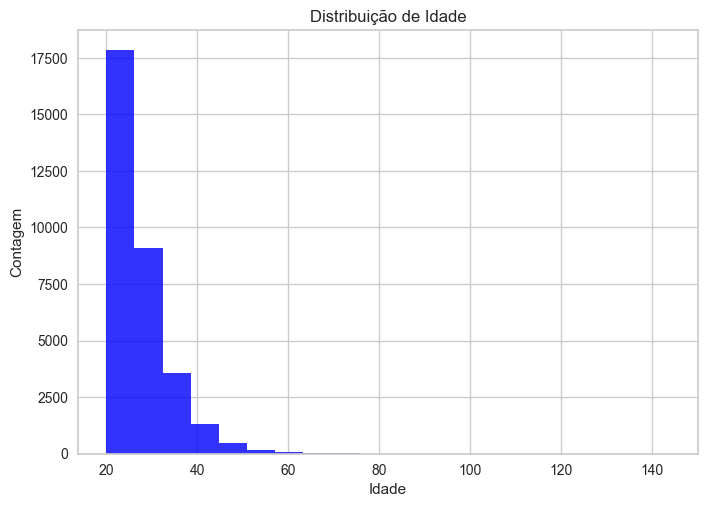

In [787]:
plt.hist(x = base_credit_risk_2["person_age"], bins=20, color='blue', alpha=0.8);

# Descrição
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de Idade')
plt.show()

**Nota:** Existem uma concentração significativa entre cliente jovens, com idades de 20 a 30 anos. Essa faixa etária apresenta uma contagem extremamente maior, se comparada as outras idades.

**OBS:** É importante ressaltar que essa conslusão foi com base na análise visual do histograma e na identificação de região com maior frequência.

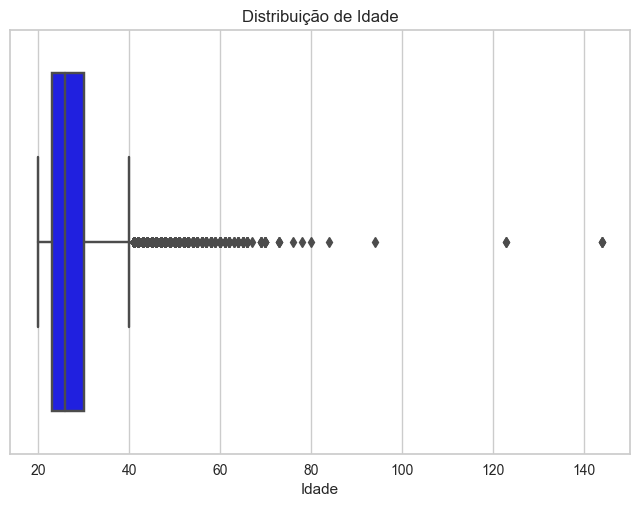

In [788]:
sns.boxplot(x = base_credit_risk_2["person_age"], color='blue');

# Descrição
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.show()

#### Visualização da renda pessoal

In [789]:
grafico = px.scatter_matrix(base_credit_risk_2["person_income"])

# Descrição
grafico.update_layout(
    title="Matriz de Dispersão - Renda pessoal",
    title_font_size=20
)

grafico.show()

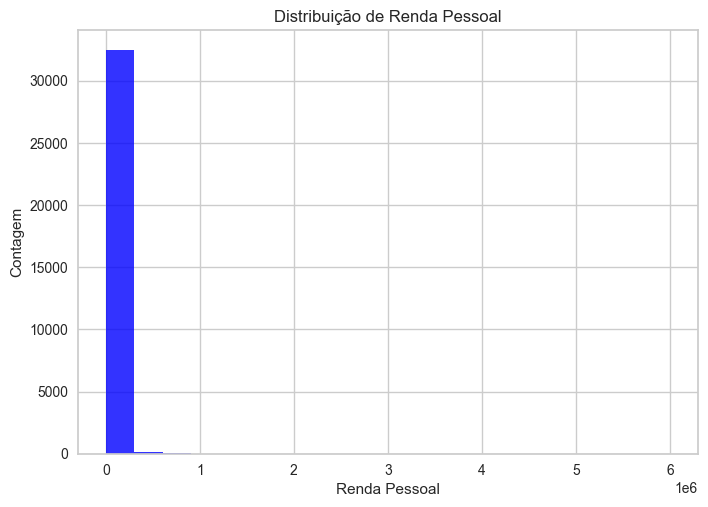

In [790]:
plt.hist(x = base_credit_risk_2["person_income"], bins=20, color='blue', alpha=0.8)

# Descrião
plt.xlabel('Renda Pessoal')
plt.ylabel('Contagem')
plt.title('Distribuição de Renda Pessoal')
plt.show()

**Nota:** A maioria dos clientes possuem uma renda pessoal na faixa de 0 a 700k. Essa faixa apresenta uma contagem maior em relação as outras.

**OBS:** É importante ressaltar que essa conslusão foi com base na análise visual do histograma e na identificação de região com maior frequência. 

#### Visualização do valor do empréstimo

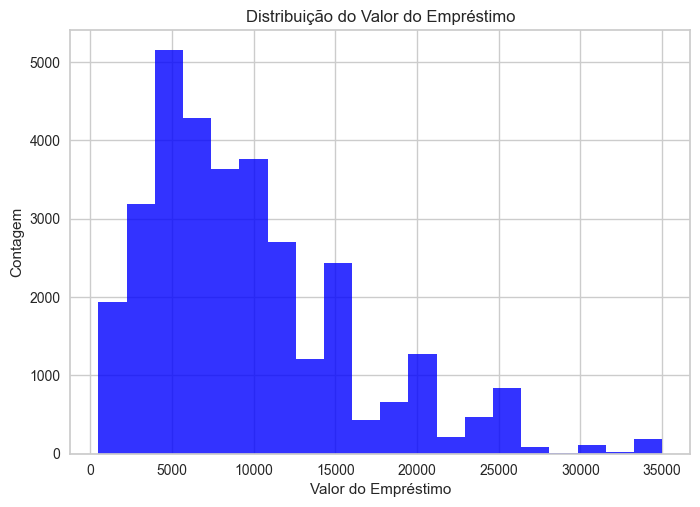

In [791]:
plt.hist(x = base_credit_risk_2["loan_amnt"], bins=20, color='blue', alpha=0.8);

# Descrição
plt.xlabel('Valor do Empréstimo')
plt.ylabel('Contagem')
plt.title('Distribuição do Valor do Empréstimo')
plt.show()

**Nota:** A maioria das pessoas tendem a pegar emprestado valores em torno de 5000 a 10000 unidade monetária. Sendo que esses valores correspondem aos picos mais alto do nosso histograma.

**OBS:** É importante ressaltar que essa conslusão foi com base na análise visual do histograma e na identificação de região com maior frequência.

#### Visualização da idade, renda pessoal e valor do empréstimo em uma matrix de gráfico de dispersão

In [792]:
grafico = px.scatter_matrix(base_credit_risk_2, dimensions=["person_age", "person_income", "loan_amnt"], color="cb_person_default_on_file", color_discrete_sequence=["yellow", "blue"])

# Descrição
grafico.update_layout(
    title="Matriz de Dispersão - Idade, Renda pessoal e Valor do empréstimo",
    title_font_size=20
)

grafico.show()

### Analisando o Mapa de calor

### Tratamento de valores duplicados

Nessa seção, iremos ver que ao realizar a contagem de valores duplicados na base de dados, foram encontrados 165 ocorrências. Portanto, procederemos com a remoção das mesmas.

Funções utilizadas para realizar o procedimento:
- **duplicated():** Retorna a linha que esta duplicada, ou seja, ele retorna a linha B se ela for igual a linha A.
- **drop_duplicated():** Remove as linhas duplicadas.
- **sum():** Retorna uma soma. Nesse caso, foi utilizada para contar a quantidade de linhas duplicadas.

In [793]:
base_credit_risk_2.duplicated().sum()

165

In [794]:
base_credit_risk_2.loc[base_credit_risk_2.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [795]:
base_credit_risk_2.drop_duplicates(inplace=True)

In [796]:
base_credit_risk_2.duplicated().sum()

0

### Tratamento de valores inconsistentes

Removendo idades extremamente altas, ou seja, aquelas maiores que 100 anos e removendo pessoas empregadas a mais de 60 anos. 

Existem alguns motivos para isso:
- **Inconsistência de dados:** Estamos considerando que essas idades são inconsistência nessa base de dados, devido a erros ou problemas nesses registros.
- **Anomalia:** É bastante incomum ter pessoas com idades extremamente altas, o que aumenta as suspeitas de erros nos dados.
- **Impácto negligível:** Como o número de registro de idades extremamente altas é pequeno em relação ao tamanho total da nossa base de dados, não afetará significamente nossa análise de dados, sendo irrelevânte.

Para realizar a remoção, vamos seguir os seguintes passos:
- Identificar as linhas que contêm **idades maiores de 100 anos**, utilizando a função ***loc*** em conjunto de uma condicional para filtrar os dados e pegar o index dessas linhas com a função ***index***.
- Identificar as linhas que contêm pessoas **empregadas a mais de 60 anos**, utilizando a função ***loc*** em conjunto de uma condicional para filtrar os dados e pegar o index dessas linhas com a função ***index***.
- Utilizar a função ***drop*** para remover as linhas idêntificadas.
- Atualizar nossa base de dados ao dropar as linhas, utilizando ***inplace=True***.

In [797]:
base_credit_risk_2.loc[base_credit_risk_2["person_age"] > 100]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [798]:
base_credit_risk_2.loc[base_credit_risk_2["person_emp_length"] > 60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [799]:
base_credit_risk_2.shape

(32416, 12)

In [800]:
base_credit_risk_2.drop(base_credit_risk_2.loc[base_credit_risk_2["person_age"] > 100].index, inplace=True)

In [801]:
base_credit_risk_2.drop(base_credit_risk_2.loc[base_credit_risk_2["person_emp_length"] > 60].index, inplace=True)

In [802]:
base_credit_risk_2.shape

(32409, 12)

### Tratamento de valores faltantes

Agora iremos analisar se existe campos vazios em nossa base de dados. Utilizaremos algumas funções da biblioteca pandas para fazer a análise:

- **isnull():** Retorna uma matriz contendo valores booleanos, indicando quais valores são nulos e quais não são.
- **sum():** Utilizamos essa função para retornar um somatório dos valores nulos retornado pela função ***isnull***.
- **fillna():** Essa função é utilizada para preencher os valores nulos com um determinado conteúdo.
- **mean():** De modo geral, retorna a média. Utilizamos para adquirir a média dos anos e dos juros.

No geral, analisamos a base de dados com o somatória dos valores nulos encontrados em cada coluna. A maioria das colunas não possuem valores faltantes, porém, as colunas ***person_emp_length*** e ***loan_int_rate*** possuem 895 e 3094 valores faltantes respectivamente.

Passos para corrigir esse problema:
1. Para a coluna ***person_emp_length***, utilizaremos a função ***mean*** para adquirir a média de anos de emprego da coluna. Em seguida, com a função ***fillna***, preencheremos os campos vazios com o valor dessa média.
2. Para a coluna ***loan_int_rate***, utilizaremos a mesma estratégia do passo 1. Com a função ***mean*** iremos adquirir a média da taxa de juros e com a função ***fillna***, preencheremos os campos vazios com o valor dessa média. 

In [803]:
base_credit_risk_2.isnull()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False


In [804]:
base_credit_risk_2.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3094
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

##### Removendo valores nulos da coluna ***person_emp_length***

In [805]:
base_credit_risk_2.loc[base_credit_risk_2["person_emp_length"].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [806]:
# Salvando as alterações com o auxílio do inplace=True
media_person_emp_length = base_credit_risk_2["person_emp_length"].mean()
base_credit_risk_2["person_emp_length"].fillna(media_person_emp_length, inplace=True)

In [807]:
# Localizando as linhas da coluna person_emp_length que foram trocadas pela média
base_credit_risk_2.loc[base_credit_risk_2["person_emp_length"] == media_person_emp_length]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,4.78285,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,4.78285,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,4.78285,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,4.78285,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,4.78285,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,4.78285,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,4.78285,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,4.78285,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,4.78285,MEDICAL,A,8575,7.51,0,0.26,N,18


In [808]:
# Verificando se a troca foi bem sucedida
base_credit_risk_2["person_emp_length"].isnull().sum()

0

##### Removendo valores nulos da tabela ***loan_int_rate***

Com a funções ***mean*** e ***fillna***, iremos preencher cada campo vazio com os valores da média dessa coluna.

In [809]:
base_credit_risk_2["loan_int_rate"].head(15)

1     11.14
2     12.87
3     15.23
4     14.27
5      7.14
6     12.42
7     11.11
8      8.90
9     14.74
10    10.37
11     8.63
12     7.90
13    18.39
14     7.90
15    10.65
Name: loan_int_rate, dtype: float64

In [810]:
base_credit_risk_2.loc[base_credit_risk_2["loan_int_rate"].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [811]:
# Salvando as alterações com o auxílio do inplace=True
media_loan_int_rate = base_credit_risk_2["loan_int_rate"].mean()
base_credit_risk_2["loan_int_rate"].fillna(media_loan_int_rate, inplace=True)

In [812]:
# Localizando as linhas da coluna person_emp_length que foram trocadas pela média
base_credit_risk_2.loc[base_credit_risk_2["loan_int_rate"] == media_loan_int_rate]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,11.017099,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,11.017099,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,11.017099,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,11.017099,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,11.017099,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,11.017099,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,11.017099,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,11.017099,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,11.017099,0,0.13,N,23


In [813]:
# Verificando se a troca foi bem sucedida
base_credit_risk_2["person_emp_length"].isnull().sum()

0

### Analisando o mapa de calor após o tratamento dos dados

**Mapa de calor:**

O mapa de calor é basicamente uma matriz de dados, com os dados mapeados em uma escala de cores (predefinidas) para fornecer um maior suporte visual na análise dos dados. É comumente utilizado para identificar padrões e relações entre atributos, sendo que a principal função dessa gráfico é destacar visualmente as variações nos valores da matriz.

Cada célula da matriz é composta por retângulos coloridos, com os valores numéricos sendo mapeados em uma escala de cores. Em outras palavras, os valores proximos de 0 são as cores mais frias e os valores proximos de 1 são as cores mais quentes, destacando assim, áreas com valores altos ou áreas com valores baixos.

**Matriz de correlações:**

Como o nome sugere, é uma matriz que mostra as correlações entre pares de variáveis em uma base de dados. Utiliza a medida de correção de Pearson, medindo as relações linear entre as duas variáveis.

Cada célula dessa matriz representa a correlação entre duas variáveis, sendo que seu valor varia entre -1 e 1. Quanto maior o valor, mais forte é a relação entre as variáveis.

**Anotações sobre esses valores:**
- **Valor 1:** indica a correlação perfeita.
- **Valor -1:** indica uma correlação negativa perfeita.
- **valor proximo de 0:** indica uma correlação fraca ou nula.

**Funções utilizadas:**
- **select_dtypes():** Utilizada para selecionar colunas de um DataFrame com base em seu tipo de dado.
- **heatmap():** Utilizada para criar um gráfico de mapa de calor.
- **corr():** calcula a matriz de correlações entre as colunas de um DataFrame.
- **corrwith():** calcular a correlação entre as colunas do DataFrame com uma coluna específica.
- **sort_values():** classifica os valores de uma variável Series em ordem. o Parâmetro ***asceding=False*** indica que a ordenção deve ser em ordem decrescente. 

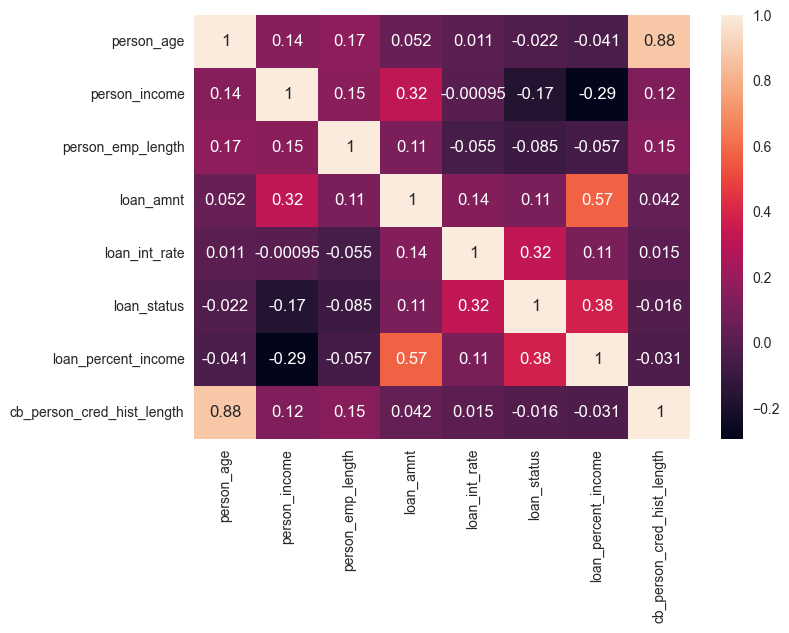

In [814]:
colunas_numericas = base_credit_risk_2.select_dtypes(include=np.number)
matrix_correlacao = colunas_numericas.corr()

sns.heatmap(matrix_correlacao, annot=True);

In [815]:
correlacoes_loan_status = colunas_numericas.corrwith(base_credit_risk_2["loan_status"])
correlacoes_loan_status.sort_values(ascending=False)

loan_status                   1.000000
loan_percent_income           0.379580
loan_int_rate                 0.320018
loan_amnt                     0.105601
cb_person_cred_hist_length   -0.016441
person_age                   -0.021774
person_emp_length            -0.084734
person_income                -0.169262
dtype: float64

#### Removendo colunas proximas de 0

In [816]:
base_credit_risk_3 = base_credit_risk_2.copy()

In [817]:
base_credit_risk_3.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [818]:
base_credit_risk_3.drop(columns=["person_income", "person_emp_length", "person_age", "cb_person_cred_hist_length"], inplace=True)

In [819]:
base_credit_risk_3.head()

,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
1,OWN,EDUCATION,B,1000,11.14,0,0.10,N
2,MORTGAGE,MEDICAL,C,5500,12.87,1,0.57,N
3,RENT,MEDICAL,C,35000,15.23,1,0.53,N
4,RENT,MEDICAL,C,35000,14.27,1,0.55,Y
5,OWN,VENTURE,A,2500,7.14,1,0.25,N


### Divisão entre previsores e classes

Faz-se necessário realizar a divisão entre previsores e classes. Utilizaremos duas variáveis, uma para armazenar somente os atributos previsores (Geralmente é associada a X) e outra para armazenar somente a classe (Geralmente é associada ao Y).
1. Variáveis:
    - **X_credit:** Variável previsora.
    - **Y_credit:** Variável classe.
2. Funções utilizadas:
    - **iloc():** responsável por selecionar as colunas desejadas.
    - **values():** responsável por converter os valores para arrays NumPy.

##### Criando a variável X_credit

In [820]:
X_credit = base_credit_risk_3.iloc[:, [0, 1, 2, 3, 4, 6, 7]].values

In [821]:
X_credit

array([['OWN', 'EDUCATION', 'B', ..., 11.14, 0.1, 'N'],
       ['MORTGAGE', 'MEDICAL', 'C', ..., 12.87, 0.57, 'N'],
       ['RENT', 'MEDICAL', 'C', ..., 15.23, 0.53, 'N'],
       ...,
       ['RENT', 'HOMEIMPROVEMENT', 'B', ..., 10.99, 0.46, 'N'],
       ['MORTGAGE', 'PERSONAL', 'B', ..., 11.48, 0.1, 'N'],
       ['RENT', 'MEDICAL', 'B', ..., 9.99, 0.15, 'N']], dtype=object)

In [822]:
type(X_credit)

numpy.ndarray

##### Criando a variável Y_credit

In [823]:
Y_credit = base_credit_risk_3.iloc[:, 5].values

In [824]:
Y_credit

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

### Tratamento das variáveis categóricas

O tratamento das variáveis categóricas é fundamental, pois os algoritmos de Machine Learning precisam processar adequadamente os dados, visto que os mesmos utilizam várias operações matemáticas. Então, para prosseguirmos, faz-se necessário realizar a conversão desses dados categóricos para dados numéricos, ou seja, iremos transformar strings em números.

Para realizar esse processo, utilizaremos o LabelEnconder:
- **LabelEnconder:** realiza um procedimento de mapeamento, associando cada valor categórico para um único número. 

**Funções utilizadas:**
- LabelEncoder.
- fit_transform: utilizado para aplicar transformações nos dados, como normalização e codificações de variáveis categóricas.

#### LabelEncoder

1. Colunas de X_credit:
    - **loan_grade:** Ordinal.
    - **person_home_ownership:** Nominal.
    - **loan_intent:** Nominal.
    - **cb_person_default_on_file:** Nominal.

In [825]:
base_credit_risk_3.head()

,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
1,OWN,EDUCATION,B,1000,11.14,0,0.10,N
2,MORTGAGE,MEDICAL,C,5500,12.87,1,0.57,N
3,RENT,MEDICAL,C,35000,15.23,1,0.53,N
4,RENT,MEDICAL,C,35000,14.27,1,0.55,Y
5,OWN,VENTURE,A,2500,7.14,1,0.25,N


In [826]:
from sklearn.preprocessing import LabelEncoder

In [827]:
label_enconder_loan_grade = LabelEncoder()                # Ordinal
label_enconder_person_home_ownership = LabelEncoder()     # Nominal
label_enconder_loan_intent = LabelEncoder()               # Nominal
label_enconder_cb_person_default_on_file = LabelEncoder() # Nominal

In [828]:
person_home_ownership = label_enconder_person_home_ownership.fit_transform(X_credit[:, 0])          # person_home_ownership
loan_intent = label_enconder_loan_intent.fit_transform(X_credit[:, 1])                              # loan_intent
loan_grade = label_enconder_loan_grade.fit_transform(X_credit[:, 2])                                # loan_grade
cb_person_default_on_file = label_enconder_cb_person_default_on_file.fit_transform(X_credit[:, 6])  # cb_person_default_on_file

In [829]:
loan_grade, person_home_ownership, loan_intent, cb_person_default_on_file

(array([1, 2, 2, ..., 1, 1, 1]),
 array([2, 0, 3, ..., 3, 0, 3]),
 array([1, 3, 3, ..., 2, 4, 3]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [830]:
X_credit[:, 0] = label_enconder_person_home_ownership.fit_transform(X_credit[:, 0])     # person_home_ownership
X_credit[:, 1] = label_enconder_loan_intent.fit_transform(X_credit[:, 1])               # loan_intent
X_credit[:, 2] = label_enconder_loan_grade.fit_transform(X_credit[:, 2])                # loan_grade
X_credit[:, 6] = label_enconder_cb_person_default_on_file.fit_transform(X_credit[:, 6]) # cb_person_default_on_file

In [831]:
X_credit[0] # Analisando a linha 0 da variável após o tratamento

array([2, 1, 1, 1000, 11.14, 0.1, 0], dtype=object)

### Escalonamento de valores

Para lidar com o escalonamento dos valores na nossa base de dados, iremos utilizar a função ***StandardScaler*** da biblioteca ***sklearn.preprocessing***. Essa função permite que os valores possuam um tamanho comparável, fornecendo uma base melhor para o treinamento de modelos, pois existem algoritmos como o kNN (k-Nearest Neighbors) ou Neive Bayes que são influenciados pelo tamanho dos valores presentes nos atributos da base de dados.

**Função utilizada:**
- **StandardScalear:** Utilizado no pré-processamento para padronizar atributo por atributo, de modo que cada valor do atributo seja transformado de acordo com a média e o desvio padrão dos valores desse atributo. O cálculo feito é x = (x - média(x))/ Desvio_padrão(x).

In [838]:
from sklearn.preprocessing import StandardScaler

In [839]:
X_credit

array([[2, 1, 1, ..., 11.14, 0.1, 0],
       [0, 3, 2, ..., 12.87, 0.57, 0],
       [3, 3, 2, ..., 15.23, 0.53, 0],
       ...,
       [3, 2, 1, ..., 10.99, 0.46, 0],
       [0, 4, 1, ..., 11.48, 0.1, 0],
       [3, 3, 1, ..., 9.99, 0.15, 0]], dtype=object)

In [840]:
standard_scaler_credit = StandardScaler()

In [841]:
X_credit = standard_scaler_credit.fit_transform(X_credit)

In [842]:
X_credit

array([[ 0.22528925, -0.88590655, -0.18886265, ...,  0.03986347,
        -0.65785627, -0.46338983],
       [-1.17023813,  0.26964234,  0.66779932, ...,  0.60099682,
         3.74358002, -0.46338983],
       [ 0.92305294,  0.26964234,  0.66779932, ...,  1.36647354,
         3.3689897 , -0.46338983],
       ...,
       [ 0.92305294, -0.30813211, -0.18886265, ..., -0.00878971,
         2.71345663, -0.46338983],
       [-1.17023813,  0.84741678, -0.18886265, ...,  0.15014401,
        -0.65785627, -0.46338983],
       [ 0.92305294,  0.26964234, -0.18886265, ..., -0.33314426,
        -0.18961836, -0.46338983]])

#### Selecionamento das bases de treinamento e teste

Nessa etapa, faz-se necessário realizar a divisão da base de dados em suas partes: uma para o processo de treinamento do algoritmo e outra para o teste, isto é, verificar a precisão que o algoritmo obteve ao tentar prever os atributos classes.

1. **Funções:** 
    - **train_teste_split:** responsável por dividir a base de dados em treinamento e teste.
        - Parâmetro **teste_size:** define a proporção dos dados que serão utilizados para teste.
        - Parâmetro **random_state:** garante que a divisão dos dados seja possível. Se executar o código com o mesmo valor, obterá a mesma divisão de dados.

In [843]:
from sklearn.model_selection import train_test_split

In [844]:
X_credit_treinamento, X_credit_teste, Y_credit_treinamento, Y_credit_teste = train_test_split(X_credit, Y_credit, test_size=0.3, random_state=0)

In [845]:
X_credit_treinamento.shape, X_credit_teste.shape

((22686, 7), (9723, 7))

In [846]:
Y_credit_treinamento.shape, Y_credit_teste.shape

((22686,), (9723,))

Foram selecionados 22.687 registros para a base de dados de treinamento do X_credit! Já para o conjunto de teste, foram selecionados 9.724 registros. Esses registros serão utilizados para alimentar o nosso algoritmo. É importante ressaltar que a quantidade de registros para o treinamento e o teste do Y é exatamente a mesma.

#### Armazenando as variáveis em um arquivo.pkl

No final deste pré-processamento, é uma boa prática salvar as variáveis X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste em arquivos.pkl. Esse processo é importante para evitar ter que repetir toda etapa de pré-processamento novamente quando necessário utilizar esse conjunto de dados em etapas futuras.

bibliotecas/funções utilizadas:
- **pickle:** essa biblioteca é utilizada para salvar objetos python em arquivos.
- **pickle.dump():** essa função serve para salvar objetos python em arquivos. Ela também consegue salvar objetos mais complexos como arrays, dicionários e modelos de Machine Learning.

In [847]:
import pickle

In [848]:
with open('credit.pkl', mode='wb') as file:
    pickle.dump([X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste], file)

## 3. Aplicando o algoritmo Naive Bayes

### Explicação sobre o Algoritmo Naive Bayes

Para esse trabalho prático de IA, foi escolhido o algoritmo Naive Bayes. 

O algoritmo Naive Bayes é um classificador probabilístico simples, isto é, utiliza probabilidades condicionais para calcular a probabilidade de um exemplo pertencer a uma determinada classe. Por ele considerar que todos os atributos da base de dados são independentes entre si (o que geralmente não é verdade), permite realizar a aplicação em diversos cenários distintos.

O processo de treinamento do Naive Bayes utiliza a base de dados de treinamento para estimar as probabilidades condicionais de cada classe. Quando treinado, o classificar consegue realizar previsões ao calcular as probabilidades condicionais de cada classe para novos exemplos, sendo que a classe escolhida será a que possuir a maior probabildade posterior, ou seja, probabilidade a posteriori. 

Por fim, o Naive Bayes utiliza como base o Teorema Bayes para realizar esses cálculos probabilísticos Dado um exemplo, esse teorema usa a probabilidade a posteriori de uma classe, probabilidade a priori e as probabilidades condicionais dos atributos das classes.

Como é realizado o cálculo:
- P(Classe|Atributos) = (P(Atributos|Classe) * P(Classe)) / P(Atributos)
    - P(Classe|Atributos): probabilidade a posteriori da classe.
    - P(Atributos|Classe): probabilidade condicional do atributo dado a classe.
    - P(Classe): probabilidade a priori da classe.
    - P(Atributos): probabilidade dos atributos.

1. Vantagens do Naive Bayes:
    - Rápido.
    - Simplicidade de interpretação.
    - Trabalha bem com vários atributos.
    - Boas previsões em base de dados pequenas.
2. Desvantagens do Naive Bayes:
    - Considera que todos os atributos da base de dados são independentes entre si. Na prática, isso nem sempre é verdade, por exemplo, não considerar que a renda pessoal tem relação com a dívida.

### Implementação do algoritmo Naive bayes

In [849]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

#### Analisando dados com o Confusion matrix do sklearn

In [850]:
X_credit_treinamento.shape, Y_credit_treinamento.shape 

((22686, 7), (22686,))

In [851]:
Y_credit_treinamento.shape, Y_credit_teste.shape

((22686,), (9723,))

In [852]:
naive_bayes_credit_risk = GaussianNB()
naive_bayes_credit_risk.fit(X_credit_treinamento, Y_credit_treinamento)

GaussianNB()

In [853]:
previsao_naive_bayes = naive_bayes_credit_risk.predict(X_credit_teste)

In [854]:
previsao_naive_bayes, Y_credit_teste # Precisamos comparar as duas

(array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

In [855]:
accuracy_score(Y_credit_teste, previsao_naive_bayes)

0.7998560115190785

In [856]:
confusion_matrix(Y_credit_teste, previsao_naive_bayes)

array([[6484, 1106],
       [ 840, 1293]], dtype=int64)

In [857]:
print(classification_report(Y_credit_teste, previsao_naive_bayes))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7590
           1       0.54      0.61      0.57      2133

    accuracy                           0.80      9723
   macro avg       0.71      0.73      0.72      9723
weighted avg       0.81      0.80      0.80      9723



#### Utilizando a Validação cruzada: K-folder no Naive Bayes

A validação cruzada, é uma técnica que com uma avaliação mais completa do desempenho de um determinado modelo de machine learning. O intuito dela é estimar como o modelo se comporta com dados não vistos, o que permite uma avalição mais completa de sua performace.

A técnica usa como base a divisão do dataframe em K pedaços (também chamados de folds) de tamanhos iguais. O modelo então sofre uma interação K vezes, sendo que cada intereção, possui um fold atuando como teste o restante como treinamento. A idéia é fazer esse procedimento, onde nunca irá acontecer de um fold ser utilizado como teste mais de uma vez.

Por fim, após as K intererações, adquirimos a média das métricas de avaliação, como precisão, acurácia, recall de cada fold para fazer uma análise geral do desempenho do nosso modelo.

**Funções utilizadas:**
- **cross_val_score:** Realiza a validação cruzada.
- **KFold:** Realiza a divisão do conjunto de dados.

In [858]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

In [859]:
kfold  = KFold(n_splits=10, shuffle=True) # Definindo o número de folds

In [860]:
naive_bayes_validacao_cruzada = GaussianNB()

In [861]:
scores_naive_bayes = cross_val_score(naive_bayes_validacao_cruzada, X_credit, Y_credit, cv=kfold)

In [862]:
scores_naive_bayes.mean()

0.8003331543000372

In [863]:
# Comparando os 2 lado a lado
naive_bayes_credit_risk.score(X_credit_teste, Y_credit_teste), scores_naive_bayes.mean()

(0.7998560115190785, 0.8003331543000372)

In [892]:
print(classification_report(Y_credit_teste, previsao_naive_bayes))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7590
           1       0.54      0.61      0.57      2133

    accuracy                           0.80      9723
   macro avg       0.71      0.73      0.72      9723
weighted avg       0.81      0.80      0.80      9723



#### Analisando dados com o Confusion matrix do yellowbrick

0.7998560115190785

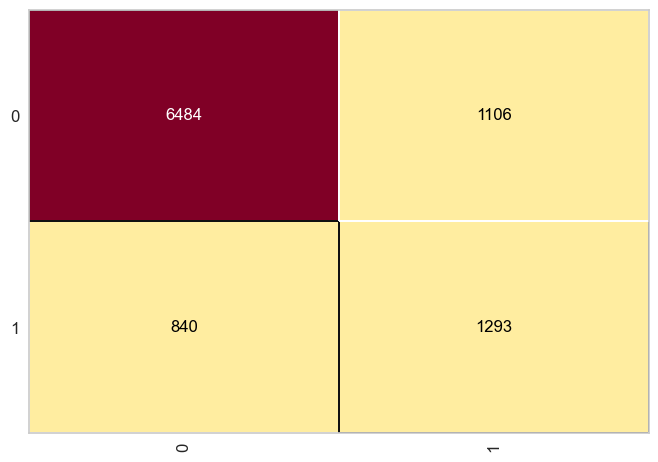

In [864]:
naive_bayes_credit_risk = ConfusionMatrix(naive_bayes_credit_risk)
naive_bayes_credit_risk.fit(X_credit_treinamento, Y_credit_treinamento)
naive_bayes_credit_risk.score(X_credit_teste, Y_credit_teste)

### Aplicando o algoritmo de Árvore de decisão

DecisionTreeClassifier: Classificador baseado em árvores de decisão

In [865]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [866]:
with open('credit.pkl', mode='rb') as file:
    X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(file)

In [867]:
X_credit_treinamento.shape, Y_credit_treinamento.shape

((22686, 7), (22686,))

In [868]:
X_credit_teste.shape, Y_credit_teste.shape

((9723, 7), (9723,))

In [869]:
arvore_decisao_credit_risk = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_decisao_credit_risk.fit(X_credit_treinamento, Y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [870]:
arvore_decisao_credit_risk.classes_

array([0, 1], dtype=int64)

In [871]:
previsao_arvore_decisao = arvore_decisao_credit_risk.predict(X_credit_teste)

In [872]:
Y_credit_teste, previsao_arvore_decisao

(array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

In [873]:
Y_credit_teste, previsao_arvore_decisao

(array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

In [874]:
accuracy_score(previsao_arvore_decisao, Y_credit_teste)

0.8651650725084851

In [875]:
print(classification_report(Y_credit_teste, previsao_arvore_decisao))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7590
           1       0.69      0.71      0.70      2133

    accuracy                           0.87      9723
   macro avg       0.80      0.81      0.81      9723
weighted avg       0.87      0.87      0.87      9723



0.8651650725084851

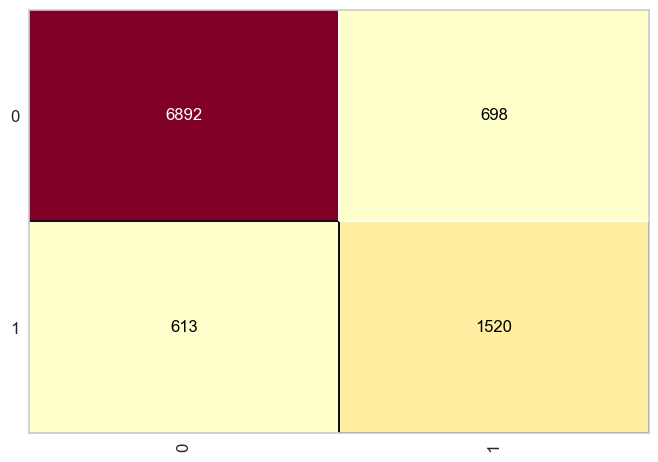

In [876]:
arvore_de_decisao_credit_risk = ConfusionMatrix(arvore_decisao_credit_risk)
arvore_de_decisao_credit_risk.fit(X_credit_treinamento, Y_credit_treinamento)
arvore_de_decisao_credit_risk.score(X_credit_teste, Y_credit_teste)

#### Utilizando a Validação cruzada: K-folder na Árvore de decisão

In [877]:
kfold  = KFold(n_splits=10, shuffle=True) # Definindo o número de folds

In [878]:
naive_bayes_validacao_cruzada = DecisionTreeClassifier()

In [879]:
scores_arvore_decisao = cross_val_score(naive_bayes_validacao_cruzada, X_credit, Y_credit, cv=kfold)

In [880]:
scores_arvore_decisao.mean()

0.8701284849592984

In [881]:
# Comparando os 2 lado a lado
arvore_de_decisao_credit_risk.score(X_credit_teste, Y_credit_teste), scores_arvore_decisao.mean()

(0.8651650725084851, 0.8701284849592984)

In [896]:
# from sklearn import tree
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
# tree.plot_tree(arvore_de_decisao_credit_risk, class_names=['0','1'], filled=True);
# fig.savefig('arvore_credit.png')